In [3]:
# Dependencies

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [4]:
# Files
trained_data = pd.read_csv('Resources/train.csv')
test_data = pd.read_csv('Resources/test.csv')

In [5]:
trained_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<Axes: xlabel='SalePrice', ylabel='Count'>

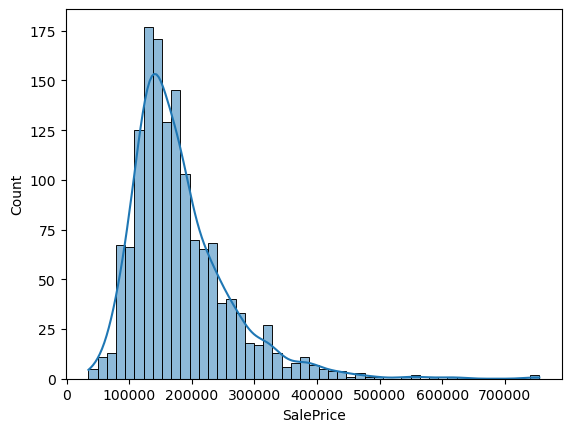

In [5]:
sns.histplot(trained_data['SalePrice'],kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

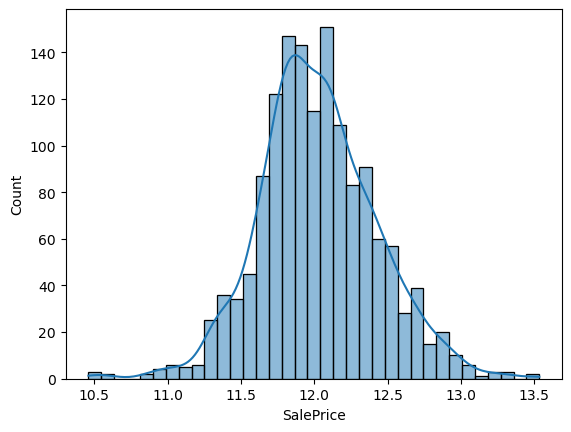

In [6]:
trained_data['SalePrice'] = np.log1p(trained_data['SalePrice'])
sns.histplot(trained_data['SalePrice'],kde=True)

In [7]:
# Making one big DF to preprocess
data = pd.concat([trained_data,test_data], axis=0)
y_train = trained_data['SalePrice']
data = data.drop(['Id', 'SalePrice'], axis=1)
print(data.shape)

(2919, 79)


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

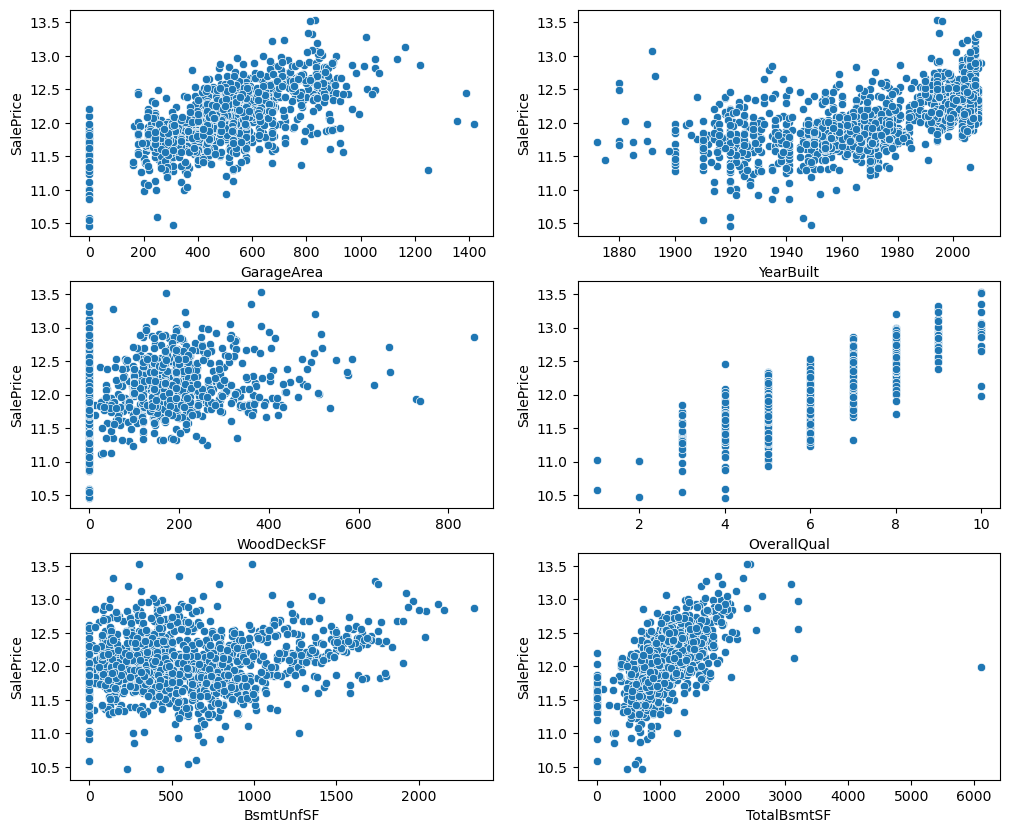

In [9]:
ig = plt.figure(figsize=(12,10))#GarageArea
plt.subplot(321)
sns.scatterplot(data=trained_data, x='GarageArea', y="SalePrice")#YearBuilt
plt.subplot(322)
sns.scatterplot(data=trained_data, x='YearBuilt', y="SalePrice")#WoodDeckSF
plt.subplot(323)
sns.scatterplot(data=trained_data, x='WoodDeckSF', y="SalePrice")#OverallQual
plt.subplot(324)
sns.scatterplot(data=trained_data, x='OverallQual', y="SalePrice")#BsmtUnfSF
plt.subplot(325)
sns.scatterplot(data=trained_data, x='BsmtUnfSF', y="SalePrice")#TotalBsmtSF
plt.subplot(326)
sns.scatterplot(data=trained_data, x='TotalBsmtSF', y="SalePrice")

In [11]:
# Getting rid of colums that have lots of blanks
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
total = data.isnull().sum().sort_values(ascending=False)
total.head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [12]:
# Filling the numeric data
missed = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
          'BsmtFullBath','BsmtHalfBath','GarageArea','GarageCars',
          'Exterior1st','Exterior2nd','SaleType','MSZoning',
          'Electrical','KitchenQual','Functional']
for feature in missed:
    data[feature] = data[feature].fillna(0)
 
    
# Deleting 'Utilities' column
data.drop(['Utilities'], axis=1, inplace=True)

In [13]:
# Top skewed columns
numeric_features = data.dtypes[data.dtypes != 'object'].index
skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


In [14]:
# Transforming skewed columns
for feature in high_skew.index:
    data[feature] = np.log1p(data[feature])

In [15]:
# Converting categorical data to numerical
data = pd.get_dummies(data)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,False,False,False,True,False,False,False,False,True,False


In [16]:
# Dividing data back into train & test
train_data =data[:len(y_train)]
test_data = data[len(y_train):]

In [17]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, random_state=78)

In [18]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Create the random forest classifier instance
rf_model = RandomForestRegressor(n_estimators=400, random_state=48)

In [37]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=400, random_state=48)

In [38]:
rf_model.score(X_test,y_test)

0.8855075957977967

In [57]:
classifier = RandomForestClassifier(n_estimators=500, random_state=78) #500 decision trees putting a vote
classifier

RandomForestClassifier(n_estimators=500, random_state=78)

In [22]:
predict = rf_model.predict(X_test)
print(predict)

[12.50143523 12.07552782 12.33430808 12.01522673 12.35975145 12.62640796
 11.86978918 11.93848135 12.12329161 11.54231    12.34409235 11.78338333
 11.85706076 11.92718478 11.86426009 11.84737088 11.99904735 11.77102149
 12.05267687 12.18828311 11.62969612 11.72591641 12.04833876 11.98616967
 12.09664526 12.52434545 11.87867715 12.42491365 11.77739409 12.47378144
 12.04283287 12.23246478 12.57134792 12.49410457 11.98186381 11.8116432
 11.82893634 11.9156814  12.19004922 11.8123834  12.28937992 11.86053294
 11.85274467 12.01206457 11.96675164 12.11489187 12.04562537 12.17404723
 12.95311344 11.41252538 11.95392592 11.74166252 11.9610321  11.66851444
 11.92305729 12.62398002 11.67474498 11.81085432 12.08478099 12.59986342
 12.21705845 12.46406396 12.16615353 11.82175462 11.89428437 12.20222548
 12.20501451 12.20406732 12.12729395 11.85928081 11.34847066 12.55119682
 12.089135   12.88364543 11.73299396 12.36623475 11.63113658 11.65799536
 11.4034685  11.99904627 11.68804979 11.86168374 11.

In [23]:
#Applying reverse of log, i.e exp
np.expm1(predict)

array([268721.6887003 , 175522.43133601, 227363.12295788, 165250.9789645 ,
       233222.25459948, 304493.39468318, 142883.11290785, 153043.09373557,
       184109.53793351, 102981.05179597, 229598.63466057, 131055.43737714,
       141075.94964636, 151323.94790408, 142095.27310857, 139715.53254911,
       162598.8165396 , 129445.31144493, 171557.03209271, 196472.5532519 ,
       112385.16511029, 123736.34428941, 170814.40635434, 160518.33309727,
       179268.44988129, 274949.24840596, 144158.72219591, 248925.67362651,
       130272.85553798, 261392.29739481, 169876.50099053, 205347.69907591,
       288181.11921469, 266758.97623622, 159828.64488273, 134811.90367232,
       137163.51783045, 149593.17449936, 196819.85253851, 134911.73004056,
       217374.1462512 , 141566.64567682, 140468.36099125, 164729.24998049,
       157431.43197333, 182569.53510423, 170351.54625531, 193695.39330386,
       422147.92873834,  90446.54785192, 155425.14142969, 125700.14765747,
       156533.5612179 , 1

In [47]:
predictions = pd.DataFrame(np.expm1(predict))

In [48]:
predictions.describe()

,0
count,365.000000
mean,182421.199936
std,67677.159220
min,84834.609556
25%,132710.409989
50%,165545.417494
75%,217756.852134
max,422147.928738


In [7]:
trained_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64